# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ensuring the requested graphs are shown
%matplotlib inline  

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/foodhub_order.csv')
# ensuring the original dataset remains unchanged
df = data_orig.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to a single order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Printing the number of rows and columns in df
print("The FoodHub\'s data set has", df.shape[0], "rows and", df.shape[1], "columns.")

The FoodHub's data set has 1898 rows and 9 columns.


#### Observations: The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Displaying the type and general info on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   The datatype of order_id, customer_id, food_preparation_time and delivery_time is expectedly integer.
*   The datatype of restaurant_name, cuisine_type and day_of_the_week is object (string), as one would have anticipated.
*   cost_of_the_order, reasonably, is in float.
*   No null value has been reported for any of the columns, but the datatype of rating is object (string), which is suspicious, as one would've expected to be float or integer. This will be inspected in the next steps.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# typing number of null values in df

print('Null values across different columns:')
print(df.isnull().sum(), end = '\n'*2)

# looking at the distinct values of rating
print('Unique rating values:')
print(df['rating'].unique())
print(df['rating'].value_counts(dropna = False))

Null values across different columns:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Unique rating values:
['Not given' '5' '3' '4']
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


In [7]:
# Creating a numerical rating column 

df['rating_num'] = df['rating'].replace('Not given', np.nan)
df['rating_num'] = df['rating_num'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_num             1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


#### Observations: 


*   Running the isnull() method returns zero null values for all the columns.
*   'Not given' input in the rating is in fact a feature of the app and a category of inputs for ratings (the most common one), for the customers who didn't take time to enter a rating for their order, and not a null value. 
*   Regardless, we have created a numerical column for rating, which will be helpful for calculating statistical properties such as mean and median, which we will later impute just for practice.  



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# We check the statistical summary of the numerical and categorcal types separately

# Numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00
rating_num,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00


In [9]:
# Categorical variables
df.describe(include = object).T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


##### Numerical:

*   Cost of the order ranges from 4.47 USD to 35.41 USD with quite a notable spread (std about 50% of the mean).
*   The minimum, maximum and average time for food preparation (in mins) are 20, 35 and 27.37 respectively. Fortunately, the range and spread of this variable are comparatively small ((std less than 25% of the mean)), i.e., the customers can predict how much they need to wait, and the waiting time most likely will not be surprisingly long. 
*   The minimum, maximum and average time for food delivery (in mins) are 15, 33 and 24.16 respectively. For the same reasons as preparation time, it's promising that this variable also has a relatively low standard deviation (std less than 1/3 of the mean).
*   The median of the *given* ratings is 5, suggesting more than 50% of the rated orders are 5-stars, which also means that 5 is the most frequent *given* rating. The average of entered ratings is 4.34. These can indicate that customers are quite happy with the food, wait time, and the overall business! Although it needs more in-dpeth analysis, left for the EDA part.  


##### Categorical:

*   Expectedly, the business is more active on the weekends.
*   American appears to be the most requested food type.
*   Shake shack is the most popular restaurant by single-handedly accounting for about 11.5% of the orders.
*   Although we created a numerical rating column too, rating can also be thought of a categorical variable, since seemingly, it can only take limited values: 0, 1, 2, 3, 4 and 5 stars (as well as 'not given'), but the occasional need for the calculation of mean and some other statistical properties suggests having ratings in numerical form is also a good idea.
*   Among all orders, 'Not given' (being unrated) is the most common rating. Among rated orders, however, 5 is the most frequent one. In the current order list, ratings have only four categories (types of entry): 'Not given' or 3, 4 or 5 stars.  




### **Question 5:** How many orders are not rated? [1 mark]


In [10]:
# Displaying the number of unrated orders
print('No. of unrated orders:', df.loc[df['rating'] == 'Not given'].shape[0])

# We can also do it by counting nans in 'rating_num' column, as we converted all 'Not given' ratings into np.nan in this column: 
print('No. of unrated orders:', df['rating_num'].isnull().sum())

No. of unrated orders: 736
No. of unrated orders: 736


#### Observations: 
736 orders (~ 39%) haven't been rated. As can be seen, both methods (counting 'Not given' in categorical rating column and counting nan in numerical rating column) lead to the same result.





### Treatment of the missing ratings:

We have already established that there is no missing value in the original dataset, but regardless, and just for practice and experimenting a few things, we choose to impute the rating_num column. 


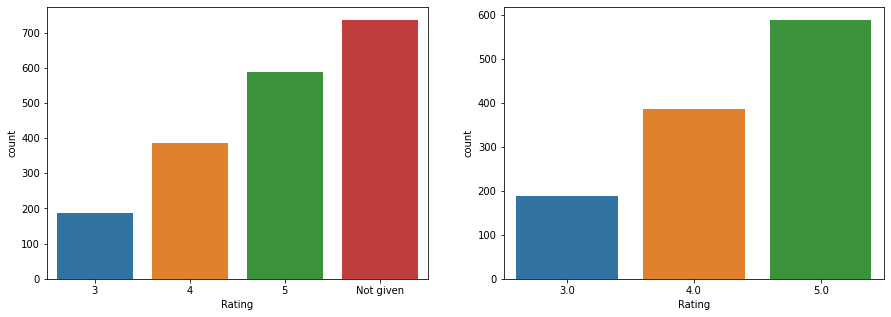

In [11]:
plt.figure(figsize = (15, 5))
# Countplot of the original (categorical) ratings
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'rating', order = ['3', '4', '5', 'Not given']);
plt.xlabel('Rating');

# Countplot of the numerical ratings
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'rating_num');
plt.xlabel('Rating');

In [12]:
# Number of each cuisine type in the order list
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [13]:
# Number of each restaurant in the order list
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: 

*   The distribution of ratings isn't too skewed, so imputation via mean and median will most likely lead to similar results, but since 5 is dominant, median might have some advantage. This will be further investigated in the following.
*   cuisine_type appears to be the best categorical variable for imputation of the rating. Doing it for the full data seems too unsophisticated, eliminating a lot of information, and adding too many 5-star ratings, and carrying it out for other categorical variables, e.g. restuarant_name, doesn't make sense, since the value counts of some of their categories is very low.



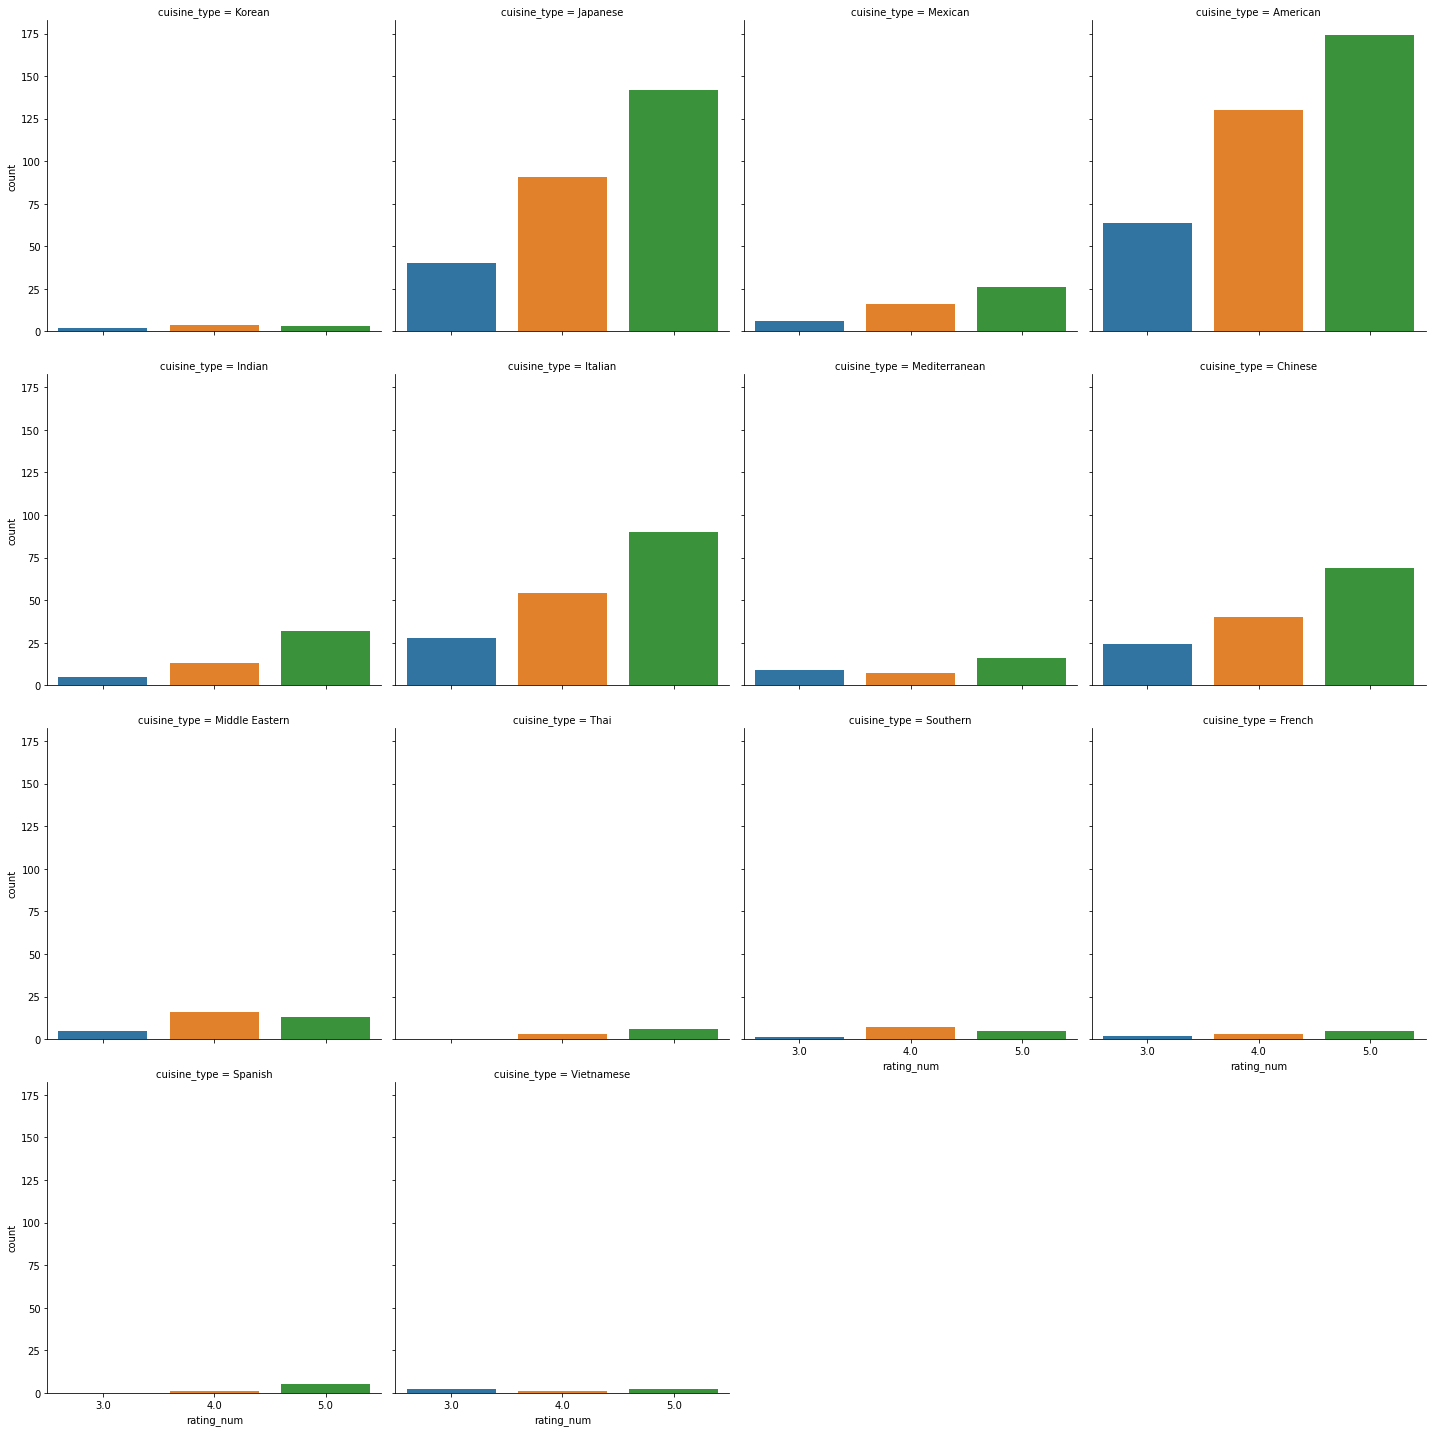

In [14]:
# Count plots of the numerical rating for all cuisine types
sns.catplot(data = df, x = 'rating_num', col = 'cuisine_type', col_wrap = 4, kind = 'count');

#### Observations: The same distribution as the full data can be more or less observed for each category of the cuisine type, i.e., 3 and 5 are respectively the least and the most frequent values.

In [15]:
# Making a smaller dataset only for entries with missing rating
rating = df[['day_of_the_week', 'cuisine_type', 'rating_num']].loc[df['rating'].isnull() == False].reset_index(drop = True)
rating.rename(columns = {'rating_num': 'rating'}, inplace = True)
rating

,day_of_the_week,cuisine_type,rating
0,Weekend,Korean,NaN
1,Weekend,Japanese,NaN
2,Weekday,Mexican,5.00
3,Weekend,American,3.00
4,Weekday,American,4.00
...,...,...,...
1893,Weekend,Mexican,5.00
1894,Weekend,American,5.00
1895,Weekday,Japanese,NaN
1896,Weekday,Mediterranean,5.00


In [16]:
# Finding out the percentage of nulls across all cuisine types

# crearing a list of all cuisines
cuisine = list(rating['cuisine_type'].unique())
for text in cuisine:
  # total number of a certain cuisine in df 
  num_food_type = rating.loc[rating['cuisine_type'] == text].shape[0] 
  # number of null ratings for that certain cuisine
  num_food_type_null = rating['rating'].loc[rating['cuisine_type'] == text].isnull().sum()
  print(round(num_food_type_null/num_food_type*100), 
        '% of rating for ', text, ' food is missing', sep = '', end = '.\n')

31% of rating for Korean food is missing.
42% of rating for Japanese food is missing.
38% of rating for Mexican food is missing.
37% of rating for American food is missing.
32% of rating for Indian food is missing.
42% of rating for Italian food is missing.
30% of rating for Mediterranean food is missing.
38% of rating for Chinese food is missing.
31% of rating for Middle Eastern food is missing.
53% of rating for Thai food is missing.
24% of rating for Southern food is missing.
44% of rating for French food is missing.
50% of rating for Spanish food is missing.
29% of rating for Vietnamese food is missing.


#### Observations: 
Only one food type has missing values exceeding 50% (and barely), so imputation isn't too far-fetched, but still not ideal, since the percentage of missing values for some cuisine types is relatively high.

In [17]:
# Displaying the mode of ratings based on their cuisine type
rating.groupby('cuisine_type')['rating'].agg(lambda x:x.value_counts().index[0])

cuisine_type
American         5.00
Chinese          5.00
French           5.00
Indian           5.00
Italian          5.00
Japanese         5.00
Korean           4.00
Mediterranean    5.00
Mexican          5.00
Middle Eastern   4.00
Southern         4.00
Spanish          5.00
Thai             5.00
Vietnamese       5.00
Name: rating, dtype: float64

In [18]:
# Displaying the median of ratings based on their cuisine type
rating.groupby('cuisine_type')['rating'].median()

cuisine_type
American         4.00
Chinese          5.00
French           4.50
Indian           5.00
Italian          5.00
Japanese         5.00
Korean           4.00
Mediterranean    4.50
Mexican          5.00
Middle Eastern   4.00
Southern         4.00
Spanish          5.00
Thai             5.00
Vietnamese       4.00
Name: rating, dtype: float64

In [19]:
# Displaying the mean of ratings based on their cuisine type
rating.groupby('cuisine_type')['rating'].mean()

cuisine_type
American         4.30
Chinese          4.34
French           4.30
Indian           4.54
Italian          4.36
Japanese         4.37
Korean           4.11
Mediterranean    4.22
Mexican          4.42
Middle Eastern   4.24
Southern         4.31
Spanish          4.83
Thai             4.67
Vietnamese       4.00
Name: rating, dtype: float64

#### Observations: 

*   Choosing mode for imputations would add many 5-star ratings, while the ratings are already dominated by 5.  
*   Mean and median both would diversify the imputation values, thereby less affecting the resulting mean, median and distribution. They both seem to be good candidates, leading to similar results, especially considering that we eventually round the imputation values, as seemingly, rating only takes 0, 1, 2, 3, 4 or 5 stars.
*   We choose to proceed with median to treat the missing values, which seems to have the least effect on distribution, as it is one of the major factors. 

### Imputation of the rating using the median of each cuisine type:

In [20]:
# Filling the missing ratings by the rounded median of their corresponding cuisine type category
df['rating_imput'] = df['rating_num'].fillna(value = df.groupby(['cuisine_type'])['rating_num'].transform('median').round())
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_num,rating_imput
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,4.00
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,5.00
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.00,5.00
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.00,3.00
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.00,4.00


#### Displaying the impacts of imputation on the data:

In [21]:
# percentage of change in mean of rating after imputation
mean_change = (df['rating_imput'].mean() - df['rating_num'].mean())/df['rating_num'].mean()*100

mean_change_cuisine = (df.groupby(['cuisine_type'])['rating_imput'].mean()
   - df.groupby(['cuisine_type'])['rating_num'].mean())/df.groupby(['cuisine_type'])['rating_num'].mean()*100

print('Post-imputation change in the rating average (%)', round(mean_change, 2), end = '\n'*2)
print('Post-imputation change in the rating average per cuisine type (%) \n', mean_change_cuisine, sep = '')

Post-imputation change in the rating average (%) 2.66

Post-imputation change in the rating average per cuisine type (%) 
cuisine_type
American         -2.57
Chinese           5.82
French           -3.10
Indian            3.19
Italian           6.20
Japanese          6.00
Korean           -0.83
Mediterranean    -1.58
Mexican           4.97
Middle Eastern   -1.70
Southern         -1.68
Spanish           1.72
Thai              3.76
Vietnamese        0.00
dtype: float64


In [22]:
# Percentage of change in median of rating after imputation

median_change = (df['rating_imput'].median() - df['rating_num'].median())/df['rating_num'].median()*100

median_change_cuisine = (df.groupby(['cuisine_type'])['rating_imput'].median()
   - df.groupby(['cuisine_type'])['rating_num'].median())/df.groupby(['cuisine_type'])['rating_num'].median()*100

print('Post-imputation change in the rating median (%)', round(median_change, 2), end = '\n'*2)
print('Post-imputation change in the rating median per cuisine type (%) \n', median_change_cuisine, sep = '')

Post-imputation change in the rating median (%) 0.0

Post-imputation change in the rating median per cuisine type (%) 
cuisine_type
American           0.00
Chinese            0.00
French           -11.11
Indian             0.00
Italian            0.00
Japanese           0.00
Korean             0.00
Mediterranean    -11.11
Mexican            0.00
Middle Eastern     0.00
Southern           0.00
Spanish            0.00
Thai               0.00
Vietnamese         0.00
dtype: float64


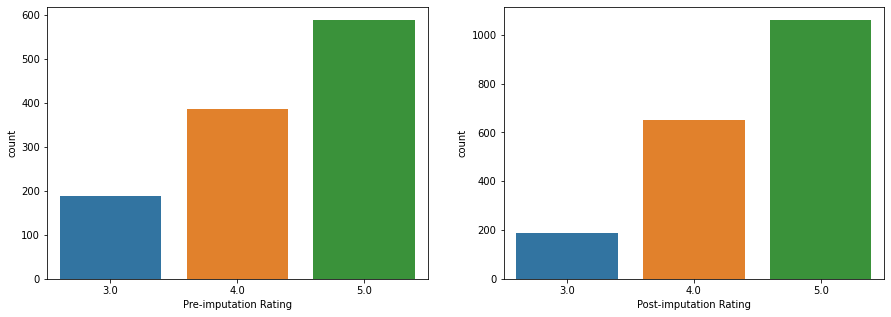

In [23]:
# Plotting the rating distribution before and after imputation

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'rating_num');
plt.xlabel('Pre-imputation Rating');
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'rating_imput');
plt.xlabel('Post-imputation Rating');

#### Observations:
As can be seen, after imputation the overall mean and the mean values across each cuisine type barely change. The median and mode also remain at 5, and although the new distribution has more 4 and 5 star ratings (with no change in 3), overall, it conveys the same message as before. 

In [24]:
# Before proceeding to EDA, let's make sure data doesn't have any duplicates!
print('The dataset has', df.duplicated().sum(), 'duplicated entries.')

The dataset has 0 duplicated entries.


#### Observations: df doesn't have any duplicated entries.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [25]:
# Exploring order ID

print('# of unique order IDs:', df['order_id'].nunique())
print('Minimum order ID:', df['order_id'].min())
print('Maximum order ID:', df['order_id'].max())
print('Difference between the maximum and minimum:', df['order_id'].max() - df['order_id'].min())

# of unique order IDs: 1898
Minimum order ID: 1476547
Maximum order ID: 1478444
Difference between the maximum and minimum: 1897


#### Observation:
As expected, there are 1898 unique order IDs, ranging from 1476547 to 1478444, and all numbers between the two are covered in the order list.

In [26]:
# Exploring customer ID

print('# of unique customer IDs:', df['customer_id'].nunique())
print('Minimum order ID:', df['customer_id'].min())
print('Maximum order ID:', df['customer_id'].max(), end = '\n'*2)

print('# of customers using the app more than once:', sum(df['customer_id'].value_counts().values > 1), end = '\n'*2)

# The customer with the highest no. of orders
df['customer_id'].value_counts()[0:1]

# of unique customer IDs: 1200
Minimum order ID: 1311
Maximum order ID: 405334

# of customers using the app more than once: 416



52832    13
Name: customer_id, dtype: int64

#### Observations:

*   There are 1200 unique cusomer IDs, indicating that most customers in the list have used the app only once.
*   Customer IDs have a huge range, perhaps indicating that some of the older customers with lower IDs and some of the newer customers with higher IDs are included. This may not be true, if the assignment of customer IDs is fully random.
*   Only 416 customers in the list have used the app more than once.
*   Customer with the ID 52832 is the most frequent customer in the list.




In [27]:
# Exploring restaurants

print('# of unique restaurants:', df['restaurant_name'].nunique(), end = '\n'*2)

print('# of restaurants that have been ordered from only once:', sum(df['restaurant_name'].value_counts().values < 2), end = '\n'*2)

# The restaurants with the highest no. of orders
df['restaurant_name'].value_counts()[0:1]

# of unique restaurants: 178

# of restaurants that have been ordered from only once: 50



Shake Shack    219
Name: restaurant_name, dtype: int64

#### Observations:

*   There are 178 unique restaurants, indicating that many of them have been ordered from several times.
*   50 restaurants have been chosen by the customers only once. These restaurants don't seem too popular, and business with them may not be too profitable for the company.
*   Shake Shack with 219 orders is the most requested restaurant. We look into top-performing restaurants in more detail in the next questions.




# of unique cuisine types: 14

Top 5 cuisne types are:
Index(['American', 'Japanese', 'Italian', 'Chinese', 'Mexican'], dtype='object')
And they account for 86.62% of all orders.



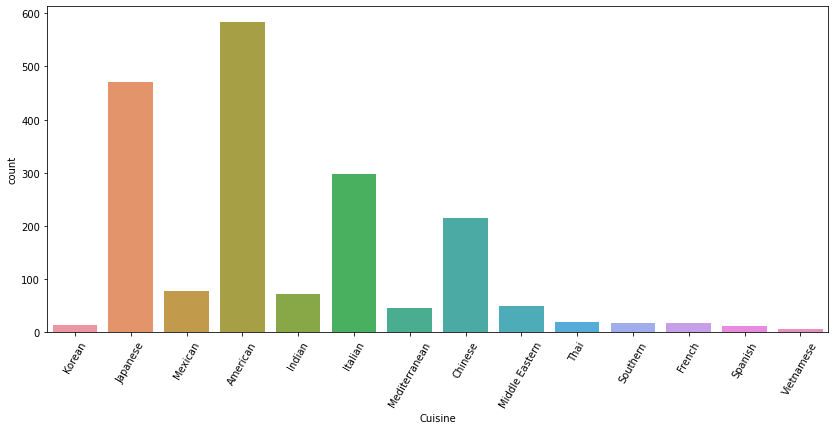

In [28]:
# Exploring cuisines

print('# of unique cuisine types:', df['cuisine_type'].nunique(), end = '\n'*2)

# The top 5 cuisine types
print('Top 5 cuisne types are:')
print(df['cuisine_type'].value_counts(normalize = True)[0:5].index)
print('And they account for ', round(sum(df['cuisine_type'].value_counts(normalize = True)[0:5].values)*100, 2),
      '% of all orders', sep = '', end = '.\n\n')

# Countplot for all cuisines
plt.figure(figsize = (14, 6));
sns.countplot(data = df, x = 'cuisine_type');
plt.xticks(rotation = 60);
plt.xlabel('Cuisine');

#### Observations:

Although there are 14 different food types, the top 5 alone account for more than 85% of the orders. The company might want to connect and make deals with more restaurants providing these types of hoghly requested cuisines.

Weekend   0.71
Weekday   0.29
Name: day_of_the_week, dtype: float64

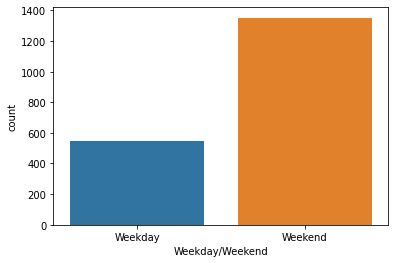

In [29]:
# Exploring the impact of the day of the week

sns.countplot(data = df, x = 'day_of_the_week', order = ['Weekday', 'Weekend']);
plt.xlabel('Weekday/Weekend')

df['day_of_the_week'].value_counts(normalize = True)

#### Observations:

As expected the business is dominated by the weekend orders, as they make up 71% of all orders. 

Pre-imputation composition of ratings: 
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: rating, dtype: float64

Post-imputation composition of ratings: 
5.00   0.56
4.00   0.34
3.00   0.10
Name: rating_imput, dtype: float64



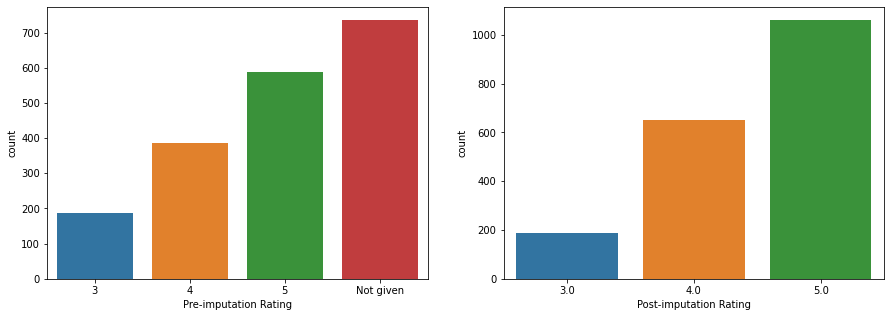

In [30]:
# Exploring ratings before and after imputation

print('Pre-imputation composition of ratings: \n', data_orig['rating'].value_counts(normalize = True), sep = '', end = '\n'*2)
print('Post-imputation composition of ratings: \n', df['rating_imput'].value_counts(normalize = True), sep = '', end = '\n'*2)

# Plotting the rating distribution before and after imputation
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'rating', order = ['3', '4', '5', 'Not given']);
plt.xlabel('Pre-imputation Rating');
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'rating_imput');
plt.xlabel('Post-imputation Rating');

#### Observations:

However we have studied the ratings repeatedly, it's good to summarize some points that we've learned from them here:

1.   Initially, 39% of the orders hadn't been rated. In fact, the most dominant category before imputation is 'Not given'. They could be left alone, but we chose to generate a new column including the imputed ratings by replacing the 'Not given' entries with the rounded median of each cuisine. 
2.   The overall distribution of the ratings doesn't change after imputation. We also showed that the median, mode and mean of the rating for the overall data and each cuisine type either don't change or are barely altered. 
3.   The percentage of 4- and 5-star ratings increases after imputation, as the rounded median of each cuisine type is either 4 or 5, but the ratio of 4-star and 5-star ratings remains nearly constant.   
4.   Discarding the unrated orders, 5 is the most dominant rating before and after the imputation.  
5. The dominance of 4 and 5 ratings (and the complete absence of 0-, 1- and 2-star reviews) reveals that customers are generally satisfied with the business. 





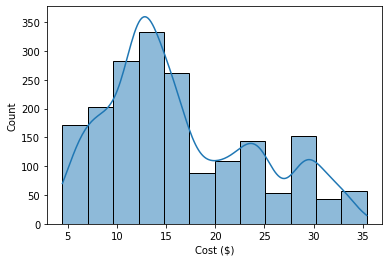

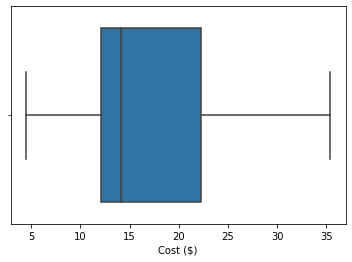

In [31]:
# Exploring costs

sns.histplot(data = df, x = 'cost_of_the_order', bins = 12, kde = True);
plt.xlabel('Cost ($)');
plt.show()

sns.boxplot(data = df, x = 'cost_of_the_order');
plt.xlabel('Cost ($)');

#### Observations:


*   The cost distribution is somewhat right-skewed, as more people propbably order only for one person and choose from the less expensive restaurants/foods. 
*   There is no outlier value in the order costs.
*   The mode and the median are located around 12 USD and 14 USD, respectively.




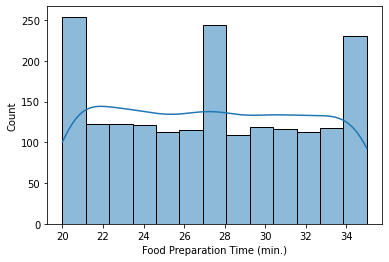

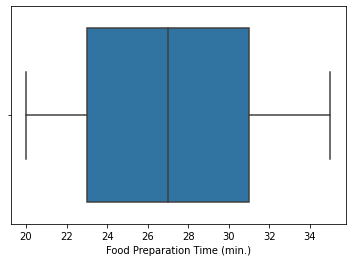

In [32]:
# Exploring food preparation time

sns.histplot(data = df, x = 'food_preparation_time', bins = 13, kde = True);
plt.xlabel('Food Preparation Time (min.)');
plt.show()

sns.boxplot(data = df, x = 'food_preparation_time');
plt.xlabel('Food Preparation Time (min.)');

#### Observations:




*   The distribution of the food preparation time looks quite uniform, and the probability density function remains fairly constant across all different preparation times.
*   No outliers is observed in the boxplot, and the distribution is not really skewed to any directions. In fact, its median (27) and mean (27.37) are nearly equal.
*   There are a few peaks in the histogram of food preparation time: One for the easy foods that can be prepared quite fast, one in the middle for the average foods in terms of complexity, and one for the time-consuming foods whose preparation can be somewhat complicated. The company would benefit from consulting with the restaurants making the foods in the latter group, to come up with the solutions that can reduce their preparation time.
   




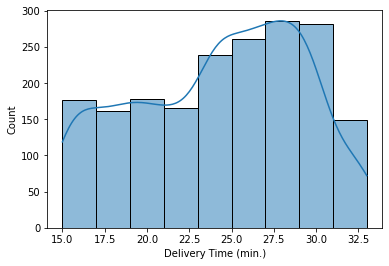

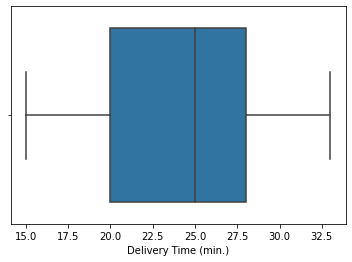

In [33]:
# Exploring delivery time

sns.histplot(data = df, x = 'delivery_time', binwidth = 2, kde = True);
plt.xlabel('Delivery Time (min.)');
plt.show()

sns.boxplot(data = df, x = 'delivery_time');
plt.xlabel('Delivery Time (min.)');

#### Observations:

*   The bin width is chosen equal to 2, which sounds reasonable when range = 18.
*   The distribution is somewhat left-skewed, with mode and median falling on 24 and 25, respectively, suggesting that for most orders delivery is somewhat slow.
*   Similar to other numerical variables, delivery time also has no outliers.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
# Using sorted value_counts on the name of the restaurants, and displying only the top 5
df['restaurant_name'].value_counts(ascending = False)[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are respectively the top 5.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
most_popular_cuisine = df.loc[df['day_of_the_week'] == 'Weekend']['cuisine_type'].mode()[0]
no_of_orders = df.loc[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()[0]
print('The most popular weekend cuisine is', most_popular_cuisine, 
      'which has been ordered', no_of_orders, 'times, during this period.')

The most popular weekend cuisine is American which has been ordered 415 times, during this period.


#### Observations: American is the most popular weekend food, with being ordered 415 times during this period.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
# Calculating the # of orders valued above 20 
food_above_20 = df.loc[df['cost_of_the_order'] > 20].shape[0]

print(round(food_above_20/df.shape[0]*100, 2), '%.', sep = '')

29.24%.


#### Observations: About 29% of the orders cost more than 20 USD.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [37]:
print(round(df['delivery_time'].mean(), 2), 'mins.')

24.16 mins.


#### Observations: On average, it takes 24.16 minutes for an order to be delivered.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [38]:
# Printing the # of orders from the top 3 frequent customers
df['customer_id'].value_counts()[0:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: Customers with the id numbers 52832, 47440 and 83287 are entitled for the vouchers, and they've respectively placed 13, 10 and 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs. Cost:

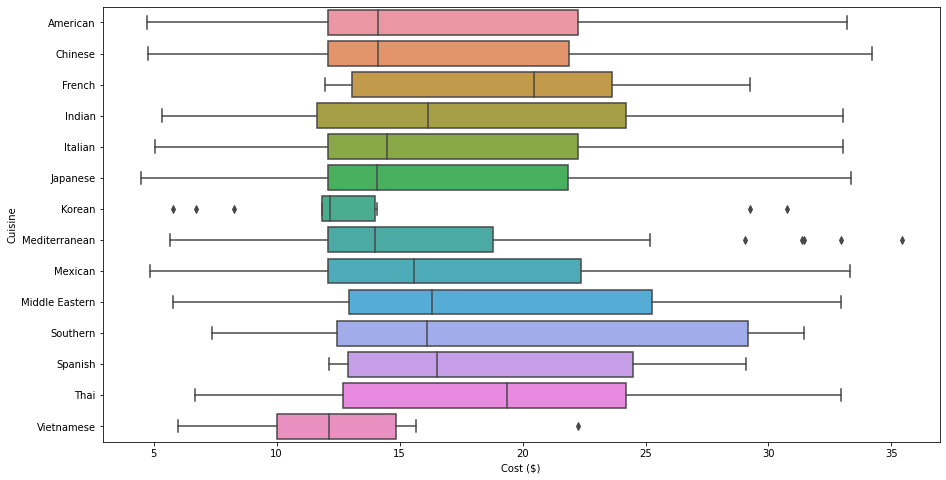

In [39]:
# Relationship between costs and cuisines

# sorting cuisines alphabetically
cuisines_sorted = list(set(df['cuisine_type'].values))
cuisines_sorted.sort()

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, y = 'cuisine_type', x = 'cost_of_the_order', order = cuisines_sorted);
plt.xlabel('Cost ($)');
plt.ylabel('Cuisine');


In [40]:
# Relationship between costs and cuisines

print('The median of the order cost for different cuisines ($):\n', 
      df.groupby(['cuisine_type'])['cost_of_the_order'].median().sort_values(ascending = False), sep = '', end = '\n'*2)

print('The mean of the order cost for different cuisines ($):\n', 
      df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending = False), sep = '', end = '\n'*2)

The median of the order cost for different cuisines ($):
cuisine_type
French           20.47
Thai             19.35
Spanish          16.52
Middle Eastern   16.30
Indian           16.15
Southern         16.11
Mexican          15.57
Italian          14.48
American         14.12
Chinese          14.12
Japanese         14.07
Mediterranean    14.00
Korean           12.18
Vietnamese       12.13
Name: cost_of_the_order, dtype: float64

The mean of the order cost for different cuisines ($):
cuisine_type
French           19.79
Southern         19.30
Thai             19.21
Spanish          18.99
Middle Eastern   18.82
Mexican          16.93
Indian           16.92
Italian          16.42
American         16.32
Chinese          16.31
Japanese         16.30
Mediterranean    15.47
Korean           14.00
Vietnamese       12.88
Name: cost_of_the_order, dtype: float64



#### Observations:



*   Vietnamese and Korean cuisines are the cheapest ones with medians around 12. 
*   The French is the most expensive cuisine, with its median exceeding 20. Thai has the second largest median, which equals 19.35. 
*   The medians of the remaining food types are more or less are close to each other and fall around 15. 
*   French and Thai cost a lot on average too, with them having the the highest and third highest average prices. The mean costs of Southern, Spanish and Middle Eastern cuisines also fall close to these two, due their highy right-skewed distributions.
*   Korean exhibits some very cheap and very expensive outliers. Mediterranean and Vietnamese have some expensive outliers. Other cuisines don't reveal any outliers.  






#### Cuisine vs. Preparation Time:

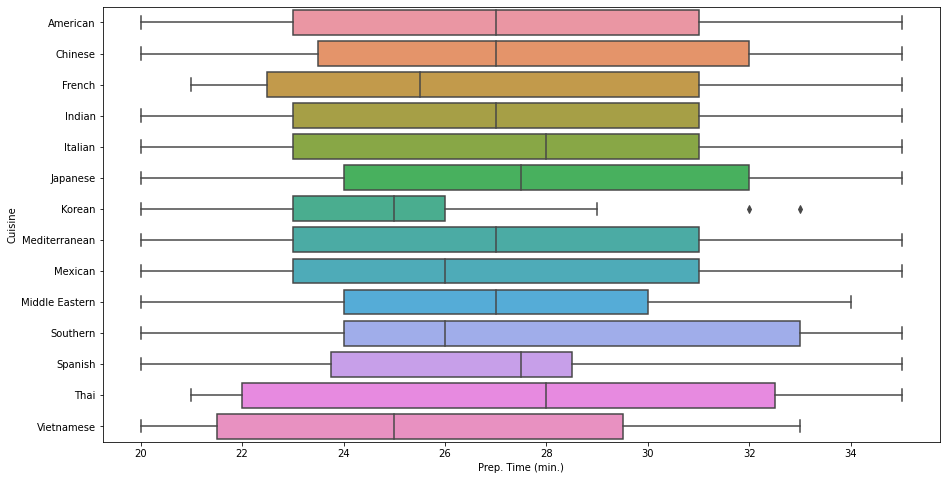

In [41]:
# Relationship between food preparation times and cuisines

# sorting cuisines alphabetically
cuisines_sorted = list(set(df['cuisine_type'].values))
cuisines_sorted.sort()

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, y = 'cuisine_type', x = 'food_preparation_time', order = cuisines_sorted);
plt.xlabel('Prep. Time (min.)');
plt.ylabel('Cuisine');

In [42]:
# Relationship between food preparation times and cuisines

print('The median of the preparation times for different cuisines (min.):\n', 
      df.groupby(['cuisine_type'])['food_preparation_time'].median().sort_values(ascending = False), sep = '', end = '\n'*2)

print('The mean of the preparation times for different cuisines (min.):\n', 
      df.groupby(['cuisine_type'])['food_preparation_time'].mean().sort_values(ascending = False), sep = '', end = '\n'*2)

The median of the preparation times for different cuisines (min.):
cuisine_type
Italian          28.00
Thai             28.00
Japanese         27.50
Spanish          27.50
American         27.00
Chinese          27.00
Indian           27.00
Mediterranean    27.00
Middle Eastern   27.00
Mexican          26.00
Southern         26.00
French           25.50
Korean           25.00
Vietnamese       25.00
Name: food_preparation_time, dtype: float64

The mean of the preparation times for different cuisines (min.):
cuisine_type
Southern         27.59
Chinese          27.51
Japanese         27.51
Italian          27.48
American         27.44
Thai             27.32
Indian           27.11
Mediterranean    27.00
Spanish          26.92
French           26.89
Mexican          26.73
Middle Eastern   26.67
Vietnamese       25.71
Korean           25.46
Name: food_preparation_time, dtype: float64



#### Observations:


*   The median preparation time of all cuisines fall in the narrow range of 25 mins. to 28 mins., with Italian and Thai occupying the top of the list and Korean and Vietnamese residing at the bottom.  
*   The Southern, Chinese and Japanese cuisines, however, top the mean preparation time list, owing to their right-skewed distributions. Nevertheless, the average food preparation time for all cuisines also lies in a very narrow range (~25.5 mins. to ~27.5 mins.).  
*   Vietnamese and Korean foods still have the lowest average preparation times.
*   Except Korean, no other cuisine shows any outliers, which is a good sign, as it makes this parameter predictable.     


#### Day of the Week vs. Preparation Time:



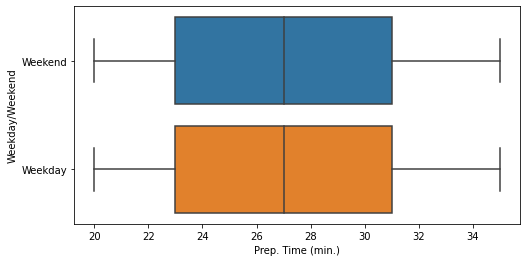

In [43]:
# Relationship between food preparation times and day of the week

plt.figure(figsize = (8, 4));
sns.boxplot(data = df, x = 'food_preparation_time', y = 'day_of_the_week');
plt.xlabel('Prep. Time (min.)');
plt.ylabel('Weekday/Weekend');

#### Observations:

One might suspect that the high demand on the weekends may slow down the food preparation process, but in general, no notable change in preparation time appears between weekdays and weekends. That may not hold for a certain restaurant or a certain cuisine.

#### Day of the Week vs. Delivery Time:


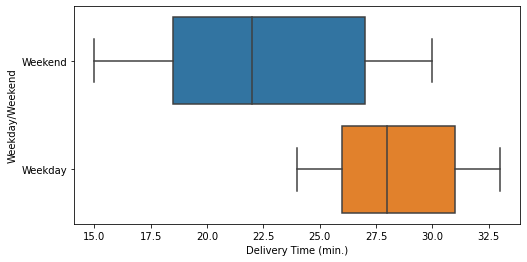

In [44]:
# Relationship between delivery times and day of the week

plt.figure(figsize = (8, 4));
sns.boxplot(data = df, x = 'delivery_time', y = 'day_of_the_week');
plt.xlabel('Delivery Time (min.)');
plt.ylabel('Weekday/Weekend');

In [45]:
# Changes in mean and median of delivery times during the week

mean_change = (df.groupby(['day_of_the_week']).delivery_time.mean()[0] - 
    df.groupby(['day_of_the_week']).delivery_time.mean()[1])/df.groupby(['day_of_the_week']).delivery_time.mean()[1]

median_change = (df.groupby(['day_of_the_week']).delivery_time.median()[0] - 
    df.groupby(['day_of_the_week']).delivery_time.median()[1])/df.groupby(['day_of_the_week']).delivery_time.median()[1]

print('Percentage of change in mean delivery time from weekends to weekdays: ', round(mean_change*100, 2), '%', sep = '')    
print('Percentage of change in median delivery time from weekends to weekdays: ', round(median_change*100, 2), '%', sep = '')    

Percentage of change in mean delivery time from weekends to weekdays: 26.12%
Percentage of change in median delivery time from weekends to weekdays: 27.27%


#### Observations:

Due to higher weekday traffick or other factors, the delivery time over weekends is significantly slower than that of weekdays.

#### Best-performing Restaurants:

Here we find out which restaurants generate the higest revenues.

In [46]:
# Best-performing restaurants

print('The revenue generated by top 10 restaurants ($):')
print(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)[0:10], end = '\n'*2)

# generating a list of top 10 restaurants 
top_restaurants = list(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)[0:10].index)

cuisine_of_top_restaurants = top_restaurants.copy()

# Iterating on top 10 restaurants to find out their cuisines
for i, text in enumerate(top_restaurants):
  cuisine_of_top_restaurants[i] = df[df['restaurant_name'] == text].cuisine_type.reset_index(drop = True)[0]

print('Cuisine of the top 10 revenue-generating restaurants:')
set(cuisine_of_top_restaurants)

The revenue generated by top 10 restaurants ($):
restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Name: cost_of_the_order, dtype: float64

Cuisine of the top 10 revenue-generating restaurants:


{'American', 'Chinese', 'Italian', 'Japanese'}

#### Observations:


*   The top 5 revenue-generating restaurants, in the same order, match the top 5 requested restaurants studied in Q5. 
*   The cuisine of these top 10 restaurants are American, Chinese, Italian and Japanese, which are in fact the top 4 requested cuisines (look at the univariate analysis). 



#### Multivariate Analysis of Numerical Variables:

Here, we add a new column to the dataset, called total_time, which measures how much it takes for the order to get to the hand of the customer from the time the order has been placed, so basically:

total_time = food_preparation_time + delivery_time

We suspect this variable might be correlated with the ratings more strongly than the preparation and delivery times.

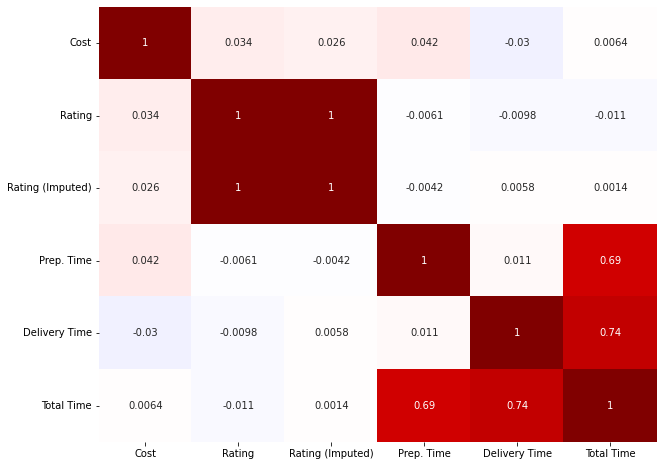

In [47]:
# Studying the correlation between numerical variables

# creating a list of numerical variables
num_variables = ['cost_of_the_order', 'rating_num', 'rating_imput', 'food_preparation_time', 'delivery_time', 'total_time']

# creating the total time column
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

plt.figure(figsize = (10, 8));
heatmap_fig = sns.heatmap(data = df[num_variables].corr(), annot = True, cmap = 'seismic', vmin = -1, vmax = 1, cbar = False);
heatmap_fig.set_xticklabels(labels = ['Cost', 'Rating', 'Rating (Imputed)', 'Prep. Time', 'Delivery Time', 'Total Time'], rotation = 0);
heatmap_fig.set_yticklabels(labels = ['Cost', 'Rating', 'Rating (Imputed)', 'Prep. Time', 'Delivery Time', 'Total Time'], rotation = 0);


#### Observations:


*   There's nearly no correlation between the rating (before and after imputation) and the three time-related variables. The same goes for the correlation between the cost of the orer and these temporal variables. Regardless we further investigate these in separate, more detailed plots.
*   Before imputation, all time variables have a negative, but very small, correlation with the the rating, as anticipated (extra wait -> less satisfaction). Total time has the highest negative correlation. Some of these correlations become positive after imputations, but in general, these changes are not of any practical importance, because the correlations (pre/post imputation) are really insignificant.  
*   Cost of the order and rating have negligible positive and negative correlation with the preparation time, respectively, as one would expect (more expensive foods may take more time to be made but this additional waiting may dissatisfy the customer), but both correlations are so vanishingly small that can readily be ignored. 
*   There's a vanishingly small corrlation between the cost and rating (pre- or post-imputation), suggesting that more expensive foods are typically of higher quality, but this is not a strong inference, as the correlation coefficient is really small.  
*   There is a natural correlation between total time and delivery and preparation times, since the former is calculated as the summation of the latter, but again, it's very trivial and doesn't provide any new insight.


#### Cost vs. Temporal Variables:

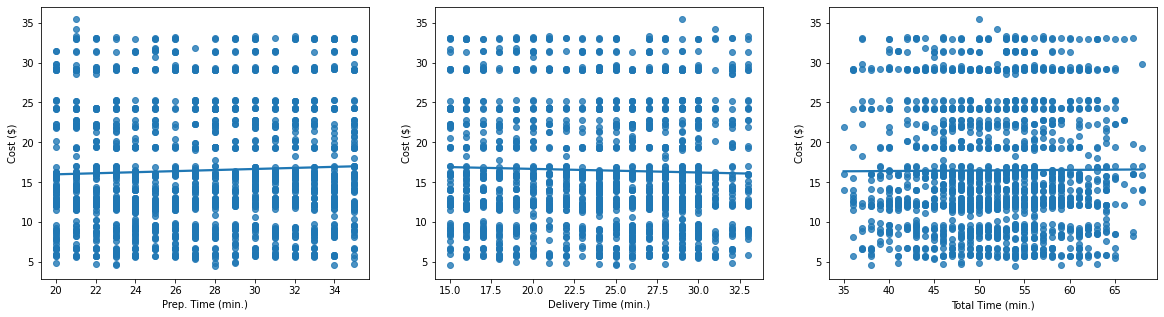

In [48]:
# cost vs. food preparation time

# separating temporal variables from other numerical variables 
time_variables = num_variables[-3:] 

# plotting the potential correlation between cost and time variables
plt.figure(figsize = (20, 5))
for i, text in enumerate(time_variables):
  plt.subplot(1, 3, i+1)
  sns.regplot(data = df, x = text, y = 'cost_of_the_order', ci = False);
  if(text == 'food_preparation_time'):
    plt.xlabel('Prep. Time (min.)');
  elif(text == 'delivery_time'):
    plt.xlabel('Delivery Time (min.)');
  else:
    plt.xlabel('Total Time (min.)');
  plt.ylabel('Cost ($)');

#### Observations:

These plots substantiate the finding of the heatmap that there is no correlation between cost and any of the time variables, as the points in these plots are all over the place and the slopes of the best fits are nearly zero.

#### Rating vs. Temporal Variables:

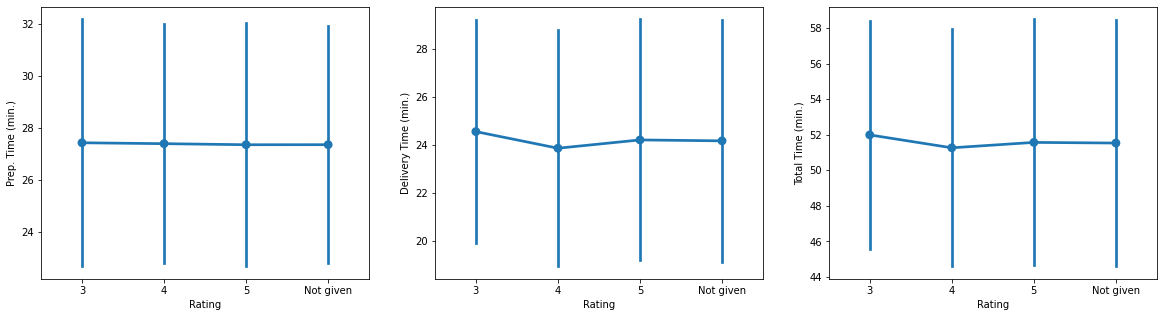

In [49]:
# cost vs. food preparation time

# plotting the potential correlation between cost and time variables
plt.figure(figsize = (20, 5))
for i, text in enumerate(time_variables):
  plt.subplot(1, 3, i+1)
  sns.pointplot(data = df, estimator = np.mean, x = 'rating', y = text, order = ['3', '4', '5', 'Not given'], ci = 'sd');
  if(text == 'food_preparation_time'):
    plt.ylabel('Prep. Time (min.)');
  elif(text == 'delivery_time'):
    plt.ylabel('Delivery Time (min.)');
  else:
    plt.ylabel('Total Time (min.)');
  plt.xlabel('Rating');

#### Observations:

*   As can be seen from the plots, there is no salient relationship between the ratings and the time variables. For all of them, the mean changes very insignificantly with the ratings, compared to all possible values that a certain time variable can acquire.  
*   The vertical lines signify one standard deviation below and above the mean. They've been shown to highlight that the variation in the mean of temporal variables with the rating is negligible in comparison with all the values that these variables can take (and the range in which they can fluctuate), for a certain rating. 



#### Cost vs. Rating:

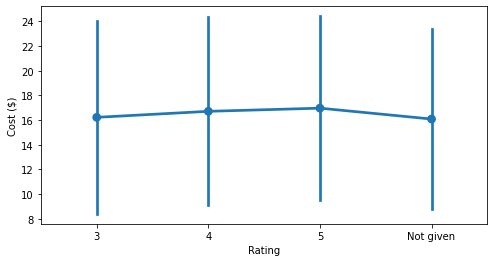

In [50]:
# cost vs. rating 

plt.figure(figsize = (8, 4))
sns.pointplot(data = df, estimator = np.mean, x = 'rating', y = 'cost_of_the_order', order = ['3', '4', '5', 'Not given'], ci = 'sd');
plt.xlabel('Rating');
plt.ylabel('Cost ($)');

#### Observations:

As the cost of the food increases, there is a slight, incremental growth in the rating for the rated orders, possibly because the food quality also has some positive correlation with the cost, but this trend is negligible, as the change in the average cost across different ratings remains quite small in comparison with the range in which the cost of the order can fluctuate. The vertical lines, indicating one standard deviation below and above the mean, have been displayed to underline this fact.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [51]:
# Making a list of the restaurants' names
restaurants = list(df['restaurant_name'].unique())

# The loop iterates on the name of restaurants and calculates the number of given ratings and their average,
# and type them if they have met the condition for the promo.
for text in restaurants:
  rated_orders = df.loc[df['restaurant_name'] == text]['rating_num'].notnull().sum()
  rating_avg = df.loc[df['restaurant_name'] == text]['rating_num'].mean()
  if(rated_orders > 50 and rating_avg > 4):
    print(text)
  

Blue Ribbon Fried Chicken
The Meatball Shop
Shake Shack
Blue Ribbon Sushi


#### Observations: 
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop are the only restaurants meeting the criteria for the propmotional offer. 


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [52]:
# Entries with cost over 20
df1 = df.loc[df['cost_of_the_order'] > 20].reset_index(drop = True)
# Entries with cost over 5 but not greater than 20
df2 = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)].reset_index(drop = True)

# total revenue generated by FoodHub
total_rev = df1['cost_of_the_order'].sum()*0.25 + df2['cost_of_the_order'].sum()*0.15

print('Total revenue generated by FoodHub from this order list is $', round(total_rev, 2), sep = '', end = '.\n') 

Total revenue generated by FoodHub from this order list is $6166.3.


In [53]:
# What if company was charging a flat rate?

revenue_flat_rate = (df1['cost_of_the_order'].sum() + df2['cost_of_the_order'].sum())*0.2
print('$', round(revenue_flat_rate, 2), sep = '')

$6254.42


#### Observations: The company generates about 6200 USD from this order list. Slightly more revenue could've been generated in the case of charging a flat rate of 20%.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [54]:
# Recalling the total_time column created in multivariate analysis and finding out how much of that column exceeds 1 hour

plus_1hr_orders = df.loc[df['total_time'] > 60].shape[0]

print(round(plus_1hr_orders/df.shape[0]*100, 2), '%', sep = '')

10.54%


#### Observations: About 10.5% of orders require more than one hour to be prepared and delivered.  


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
time_diff = df.groupby(['day_of_the_week'])['delivery_time'].mean()[0] - df.groupby(['day_of_the_week'])['delivery_time'].mean()[1]
print('Weekend delivery is', round(time_diff, 2), 'minutes faster than weekday delivery.', end = '\n'*2)
df.groupby(['day_of_the_week'])['delivery_time'].mean()


Weekend delivery is 5.87 minutes faster than weekday delivery.



day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations: The food delivery on weekdays is somewhat (~ 5.87 mins.) slower than weekends, which is expectable, due to the rush-hour traffick of the weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


1.   Vast majority of the customers (~ 65%) have used the app only once, and a big fraction (~ 28%) of restaurants have been requested only once.
2.   However 39% of the orders haven't been rated (the most comon type of rating), from the rated orders we can deduce that customers are generally happy with the business, with the mean and median rating of the rated customers being equal to 4.34 and 5, respectively. 
3.   American, Japanese, Italian, Chinese and Mexican are respectively the top 5 requested cuisines, which, combined, account for more than 85% of the orders. On the other hand, Vietnamese, Spanish and Korean appear to be quite unpopular, together making up less than 2% of all orders.
4. The top 10 revenue-generating restaurants account for ~ 47% of the orders. The cuisine types of these restaurants match the top 4 popular cuisines. 
5. While the distribution of food preparation time is fairly uniform, the distribution of the delivery time looks relatively left-skewed, indicating that the delivery process for most orders is somewhat slow and can certainly be improved.
6. The distribution of the order cost is fairly right-skewed, with its median falling around 14 USD, suggesting that most customers go for cheap or medium-range-price restaurants/foods.
7. The business is far more active on weekends. 
8. French and Thai are the most costly food types with their medians  being around 20 USD. Vietnamese and Korean are the least expensive cuisines, whose median order cost is about 12 USD. Other cuisines have median order costs close to each other and falling around 15 USD. 
9. There is no meaningful difference between the preparation times of different cuisines, as the median preparation time for all of them resides in the narrow range of 25 to 28 minutes. 
10. Food preparation time, delivery time and total time (prep. time + delivery time) seem to have little to no effect on the satisfaction of the customers (rating). Rating and cost are also almost uncorrelated.    



### Recommendations:


1.   For about 10% of the orders, the preparation and delivery times together take more than one hour. This is mostly affected by the slow delivery process. The company can further localize restaurants by increasing the number of restaurants in its network, especially those that provide the more popular cuisines, so that the drive time from restaurants to customers' homes is drastically reduced. 
2. Most revenue is generated by a handful of very popular cuisines. The company should invest in bringing more restaurants providing those certain cuisines into its network, and pay less attention and spend less advertising and PR money on unpopular cuisines. This can turn out to be a two-pronged strategy that in addition to generating more revenue can further reduce the delivery time (by increasing the # of restaurants in the hub and further localizing them).  
3. Since most orders cost moderate or low, a flat rate 20% charge of restaurants would generate more revenue for the company than the current bracket-based system (25% for orders above 20 USD and 15% for those above 5 USD). This is something to be studied by the company to ensure this idea doesn't repel the restaurants.  
4. However the delivery process on the weekends is currently quite fast, since weekend orders comprise the vast majority of the business, the company should further ensure it has all logistics and infrastructure in place for the weekend, in particular, it should reassure it has enough delivery employees for this timespan.   
5. At the moment, close to 40% of the customers do not rate the service they receive. Although the ratings are fairly high, more ratings and reviews would provide more valuable information for the company on the popular cuisines, restaurants, etc. It also affects the promo offers the restaurants might get. The company should provide customers with more incentives to input their ratings. For example, the app can send notificatins when the rating isn't entered a few hours after the order, or it can put the name of customers who rate all their orders in a monthly raffle that'd give one free meal each month to a few lucky customers.
6. Only ~ 35% of the customers have used the app more than once in the timespan of gathering the dataset. This seems quite low. The company should incentivize the recurrent customers by offering them vouchers, discounts, etc. more than what is already considered. For instance, the top 1% customers who've rated all their orders would get one monthly free meal. This helps with the suggestion #5, too.  
7. More than 1/3 of the orders come for only 5 restaurants. The company should ensure that it has enough delivery employees in the neighborhoods of those restaurants, if it hasn't done so already.     




---